## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(12)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3219504, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3219504, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219504 entries, 0 to 3219503
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3219504.0    344.283807   
Codigo OMM                                  3218760.0  85362.851717   
Day                                         3219504.0     16.030415   
H(UTC)                                      3219504.0     11.500000   
Latitude                                    3219504.0    -15.883430   
Longitude                                   3219504.0    -47.765900   
Month                                       3219504.0     12.000000   
PRECIPITACAO (mm)                           2916076.0      0.223878   
PRESSAO ATMOSFERICA (hPa)                   2973013.0    963.885375   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2972174.0    964.179177   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2971848.0    963.597922   
RADIACAO GLOBAL (KJ/M2)                     1637209.0   1508.050539   
TEMPERATURA DO AR (C)                       2989289.0     24.884532   
TEMPERATURA DO PONTO DE ORVALHO (C)         2962455.0     19.314783   
TEMPERATURA MAXIMA (C)                      2988577.0     25.515477   
TEMPERATURA MINIMA (C)                      2988687.0     24.291818   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2962578.0     19.861813   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2960286.0     18.791812   
UMIDADE RELATIVA DO AR (%)                  2965918.0     74.131177   
UMIDADE RELATIVA DO MAXIMA AR (%)           2965948.0     76.963709   
UMIDADE RELATIVA DO MINIMA AR (%)           2963996.0     71.151475   
VENTO VELOCIDADE                            2940354.0      2.169908   
VENTO, DIRECAO (graus)                      2920139.0    153.409619   
VENTO, RAJADA MAXIMA (m/s)                  2938211.0      5.199261   
Year                                        3219504.0   2010.701795   

                                                    std           min  \
Altitude(metros)                             287.868647      1.001000   
Codigo OMM                                  2257.018597  81609.000000   
Day                                            8.943287      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.139278    -33.742297   
Longitude                                      6.931641    -72.786778   
Month                                          0.000000     12.000000   
PRECIPITACAO (mm)                              1.601601      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.746469    809.800000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.755207    809.900000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.740567    809.400000   
RADIACAO GLOBAL (KJ/M2)                     1177.976306      0.000000   
TEMPERATURA DO AR (C)                          4.349898     -2.800000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.194958    -40.200000   
TEMPERATURA MAXIMA (C)                         4.527913     -2.900000   
TEMPERATURA MINIMA (C)                         4.169731     -7.100000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     3.119035    -21.500000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.304652    -33.500000   
UMIDADE RELATIVA DO AR (%)                    18.196271     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             17.201540      0.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             19.018303      0.000000   
VENTO VELOCIDADE                               1.741356      0.000000   
VENTO, DIRECAO (graus)                       105.958367      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     3.048892      0.000000   
Year                                           3.091943   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86732.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     12   
1             185.0     81963.0    1       1 -9.358353 -69.926257     12   
2             185.0     81963.0    1       2 -9.358353 -69.926257     12   
3             185.0     81963.0    1       3 -9.358353 -69.926257     12   
4             185.0     81963.0    1       4 -9.358353 -69.926257     12   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      988.6                             988.6   
1                      989.4                             989.4   
2                      991.1                             991.1   
3                      991.5                             991.5   
4                      991.9                             992.1   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             988.0                      NaN   
1                             988.6                      NaN   
2                             989.5                      NaN   
3                             991.1                      NaN   
4                             991.5                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   23.1                                 22.1   
1                   22.7                                 21.8   
2                   23.2                                 22.3   
3                   23.2                                 22.2   
4                   23.1                                 22.0   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    24.6                    23.1   
1                    23.1                    22.7   
2                    23.2                    22.7   
3                    23.2                    23.0   
4                    23.2                    23.1   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.3   
1                                        22.0   
2                                        22.3   
3                                        22.3   
4                                        22.2   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.9                        94.0   
1                                        21.8                        95.0   
2                                        21.8                        95.0   
3                                        22.1                        94.0   
4                                        22.0                        94.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               94.0                               87.0   
1                               95.0                               94.0   
2                               95.0                               95.0   
3                               95.0                               94.0   
4                               94.0                               94.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.1                   354.0                         2.7   
1                0.0                   295.0                         0.7   
2                0.4                   239.0                         1.0   
3                0.5                    49.0                         1.4   
4                0.7                    27.0                         1.9   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3219499               6.0     86618.0   31      19 -10.473959 -36.482051   
3219500               6.0     86618.0   31      20 -10.473959 -36.482051   
3219501               6.0     86618.0   31      21 -10.473959 -36.482051   
3219502               6.0     86618.0   31      22 -10.473959 -36.482051   
3219503               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3219499     12  Brejo Grande-A421                0.0   
3219500     12  Brejo Grande-A421                0.0   
3219501     12  Brejo Grande-A421                0.0   
3219502     12  Brejo Grande-A421                0.0   
3219503     12  Brejo Grande-A421                0.0   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3219499                     1011.8                            1011.8   
3219500                     1012.1                            1012.1   
3219501                     1012.3                            1012.4   
3219502                     1012.6                            1012.6   
3219503                     1013.3                            1013.3   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3219499                            1011.6                 1725.935   
3219500                            1011.8                  661.070   
3219501                            1012.1                   85.081   
3219502                            1012.3                      NaN   
3219503                            1012.6                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3219499                   29.1                                 20.7   
3219500                   28.3                                 20.0   
3219501                   26.8                                 20.6   
3219502                   26.3                                 20.0   
3219503                   25.8                                 19.9   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3219499                    30.7                    28.9   
3219500                    29.4                    28.0   
3219501                    28.3                    26.8   
3219502                    26.9                    26.3   
3219503                    26.4                    25.8   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3219499                                        21.1   
3219500                                        20.9   
3219501                                        20.6   
3219502                                        20.7   
3219503                                        20.1   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3219499                                        19.7   
3219500                                        20.0   
3219501                                        19.7   
3219502                                        20.0   
3219503                                        19.6   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3219499                        61.0                               61.0   
3219500                        61.0                               63.0   
3219501                        69.0                               69.0   
3219502                        68.0                               69.0   
3219503                        70.0                               70.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3219499                               52.0                3.7   
3219500                               58.0                3.4   
3219501                               61.0                3.2   
3219502                               68.0                2.3   
3219503                               67.0                1.5   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3219499     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.023109
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                              9.424682
PRESSAO ATMOSFERICA (hPa)                      7.656179
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               7.682239
PRESSAO ATMOSFÉRICA MINIMA (hPa)               7.692365
RADIACAO GLOBAL (KJ/M2)                       49.147167
TEMPERATURA DO AR (C)                          7.150636
TEMPERATURA DO PONTO DE ORVALHO (C)            7.984118
TEMPERATURA MAXIMA (C)                         7.172751
TEMPERATURA MINIMA (C)                         7.169334
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     7

In [9]:
data.dropna().shape

(1531541, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1687963

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.245598
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.000093
TEMPERATURA DO PONTO DE ORVALHO (C)             0.044541
TEMPERATURA MAXIMA (C)                          0.000031
TEMPERATURA MINIMA (C)                          0.000404
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

# Matriz de correlação dos dados

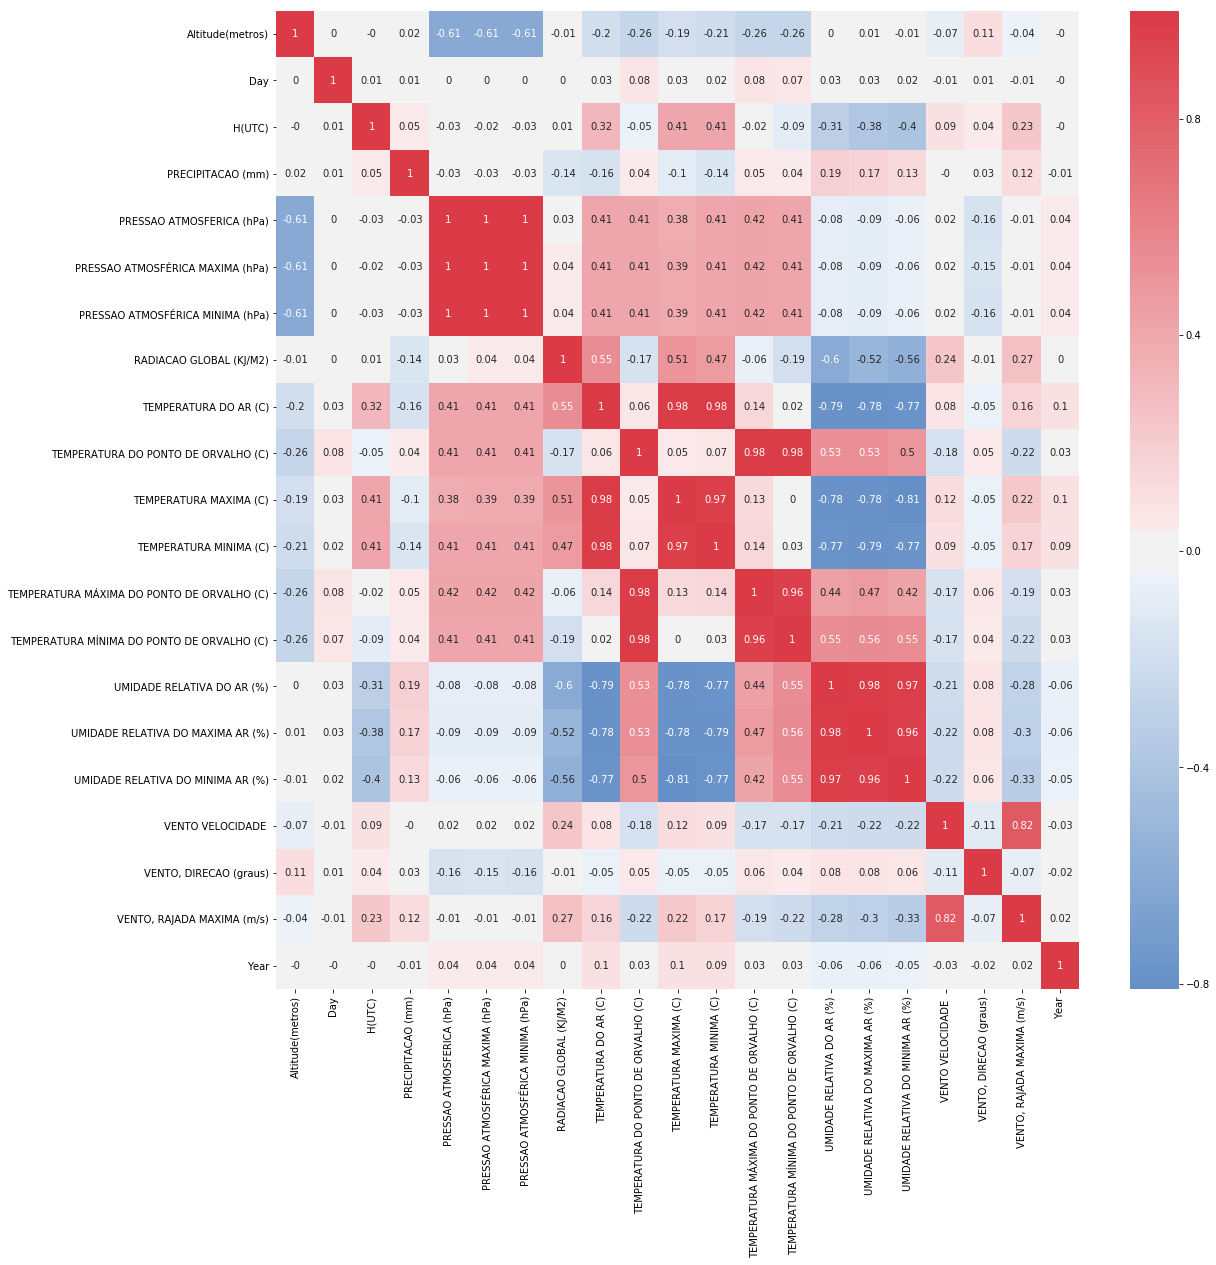

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [15]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [16]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [17]:
len(ur_list)

1

In [18]:
ur_list

['Parque Estadual Chandless-A102']

In [19]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    834
UMIDADE RELATIVA DO MINIMA AR (%)    834
UMIDADE RELATIVA DO AR (%)           834
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [20]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [21]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [22]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              11
Codigo OMM                                    11
Day                                           11
H(UTC)                                        11
Latitude                                      11
Longitude                                     11
Month                                         11
Nome                                          11
PRECIPITACAO (mm)                             11
PRESSAO ATMOSFERICA (hPa)                     11
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              11
PRESSAO ATMOSFÉRICA MINIMA (hPa)              11
RADIACAO GLOBAL (KJ/M2)                        1
TEMPERATURA DO AR (C)                         11
TEMPERATURA DO PONTO DE ORVALHO (C)           11
TEMPERATURA MAXIMA (C)                        11
TEMPERATURA MINIMA (C)                        11
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    11
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    11
UMIDADE RELATIVA DO AR (%)                     3
UMIDADE RELATIVA DO 

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [23]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [24]:
len(temp_max_list)

1

In [25]:
temp_max_list

['Goiânia-A002']

In [26]:
map_temp_max

In [36]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 4 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]



In [38]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 4 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]



In [40]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 4 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]



In [42]:
data.loc[(data['TEMPERATURA MAXIMA (C)']<0) & (data['TEMPERATURA MAXIMA (C)']>40) & (data['Nome']==temp_max_list[0])]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [43]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<0]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
436113             727.0     86734.0    1       9 -16.642841 -49.220222   

        Month          Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
436113     12  Goiânia-A002                0.0                      931.6   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
436113                             931.6                             931.0   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
436113                     4.94                    NaN   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
436113                                  NaN                    -2.9   

        TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
436113                     NaN                                        -3.5   

        TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
436113                                         NaN   

        UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
436113                        98.0                               98.0   

        UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
436113                               97.0                0.0   

        VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year   Cidade  \
436113                   314.0                         1.3  2007  Goiânia   

       Estado        Regiao  
436113  Goias  Centro Oeste

In [47]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
427939  Goiânia-A002                    36.7                    40.1   
428254  Goiânia-A002                    25.8                    43.4   
428270  Goiânia-A002                    33.2                    42.1   
428293  Goiânia-A002                    34.4                    42.6   
428294  Goiânia-A002                    33.5                    40.4   
428319  Goiânia-A002                    38.1                    40.7   
428321  Goiânia-A002                    37.6                    43.7   
428322  Goiânia-A002                    39.9                    42.7   
428323  Goiânia-A002                    38.9                    40.6   
428324  Goiânia-A002                    38.8                    41.0   
428325  Goiânia-A002                    38.3                    40.1   
428339  Goiânia-A002                    39.5                    44.8   
428346  Goiânia-A002                    43.5                    45.0   
428347  Goiânia-A002                    44.1                    44.8   
428348  Goiânia-A002                    39.7                    44.4   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
427939                   36.7  2005    1      19  
428254                   25.9  2005   14      22  
428270                   33.2  2005   15      14  
428293                   40.4  2005   16      13  
428294                   33.5  2005   16      14  
428319                   39.0  2005   17      15  
428321                    NaN  2005   17      17  
428322                   40.0  2005   17      18  
428323                   39.6  2005   17      19  
428324                   40.1  2005   17      20  
428325                   38.4  2005   17      21  
428339                    NaN  2005   18      11  
428346                    NaN  2005   18      18  
428347                    NaN  2005   18      19  
428348                   39.7  2005   18      20

In [51]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [28]:
len(temp_min_list)

2

In [29]:
temp_min_list

['Morro da Igreja (Bom Jardim da Serra)-A845',
 'Rio de Janeiro - Marambaia-A602']

In [30]:
map_temp_min

In [52]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 0 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]

Estação: ['Rio de Janeiro - Marambaia-A602'] Numero de Registross: 0 Região/Estado: ['Sudeste']/['Rio de Janeiro']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [53]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 0 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]

Estação: ['Rio de Janeiro - Marambaia-A602'] Numero de Registross: 0 Região/Estado: ['Sudeste']/['Rio de Janeiro']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [54]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=0,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC)]
Index: []

In [55]:
df_temp = data.loc[lambda df: df.Nome ==temp_min_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC), Altitude(metros), UMIDADE RELATIVA DO AR (%)]
Index: []

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [35]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

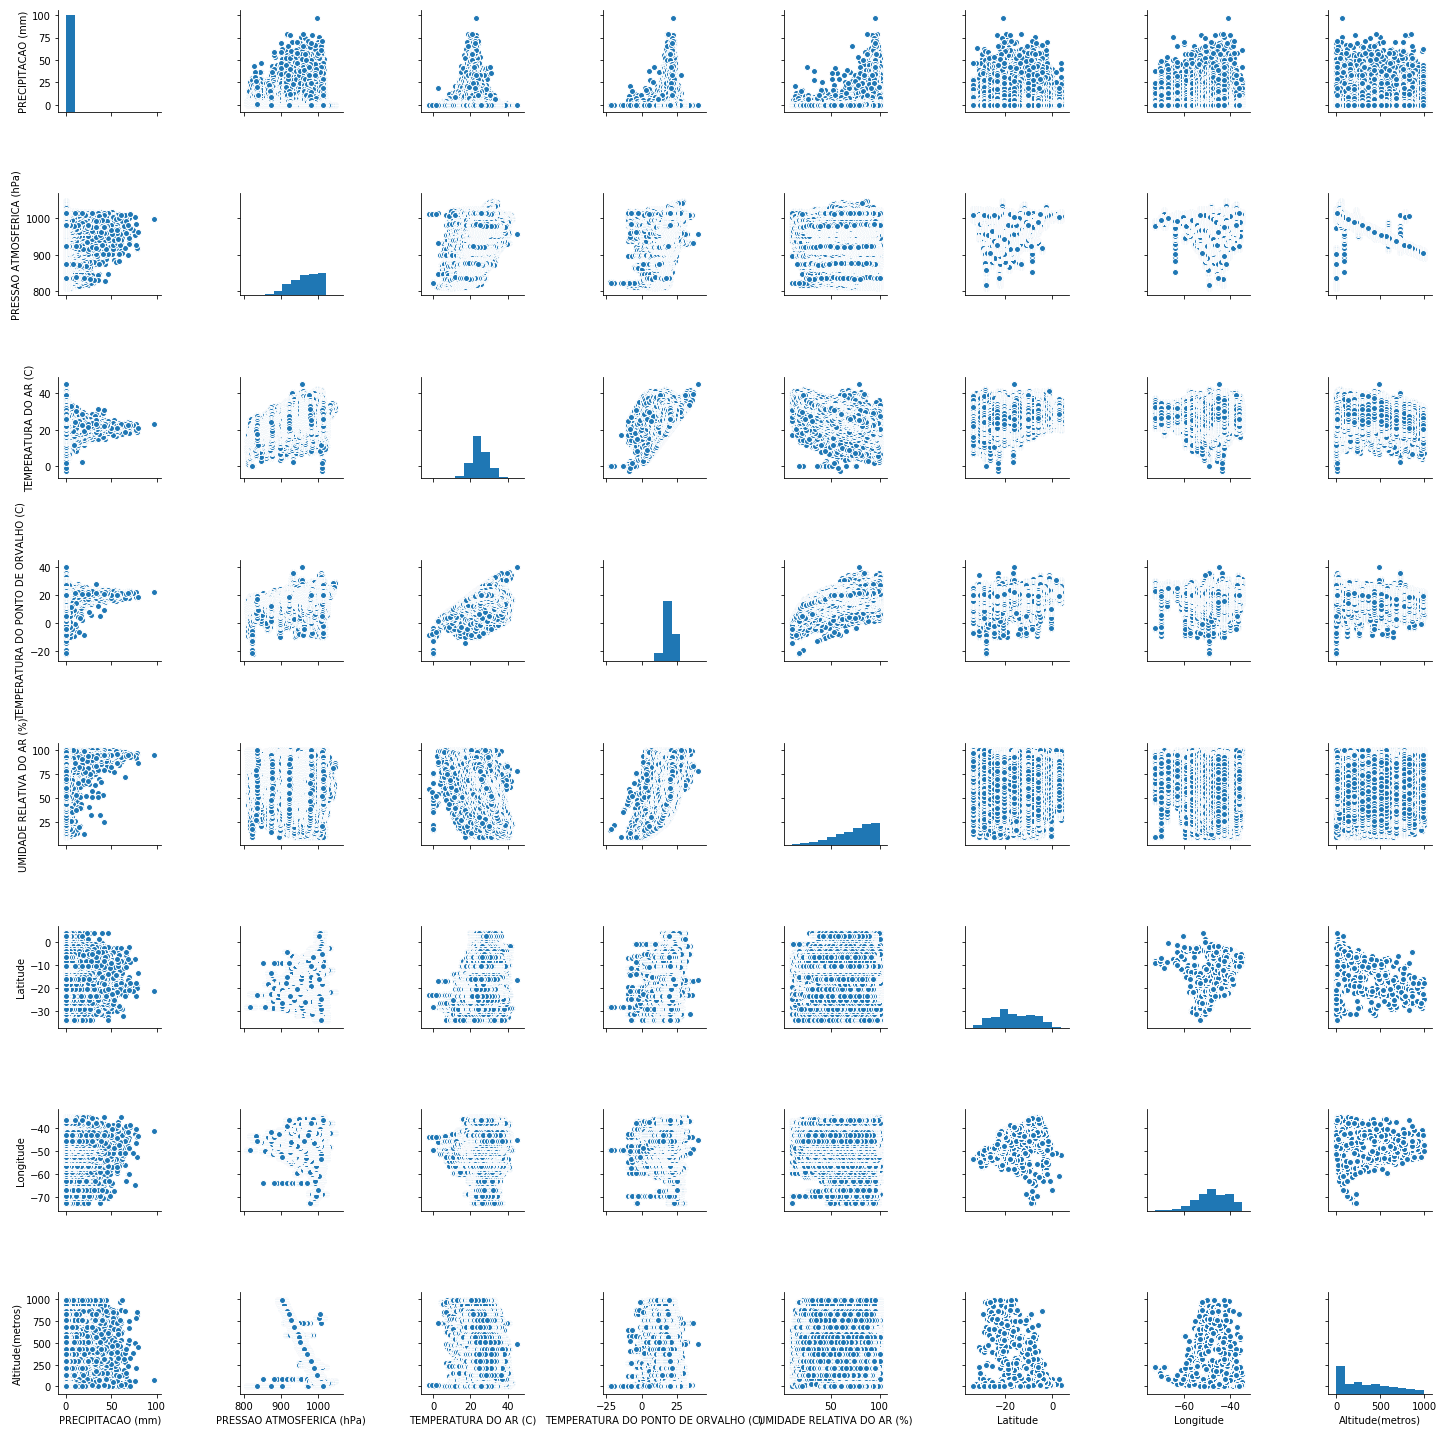

In [56]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

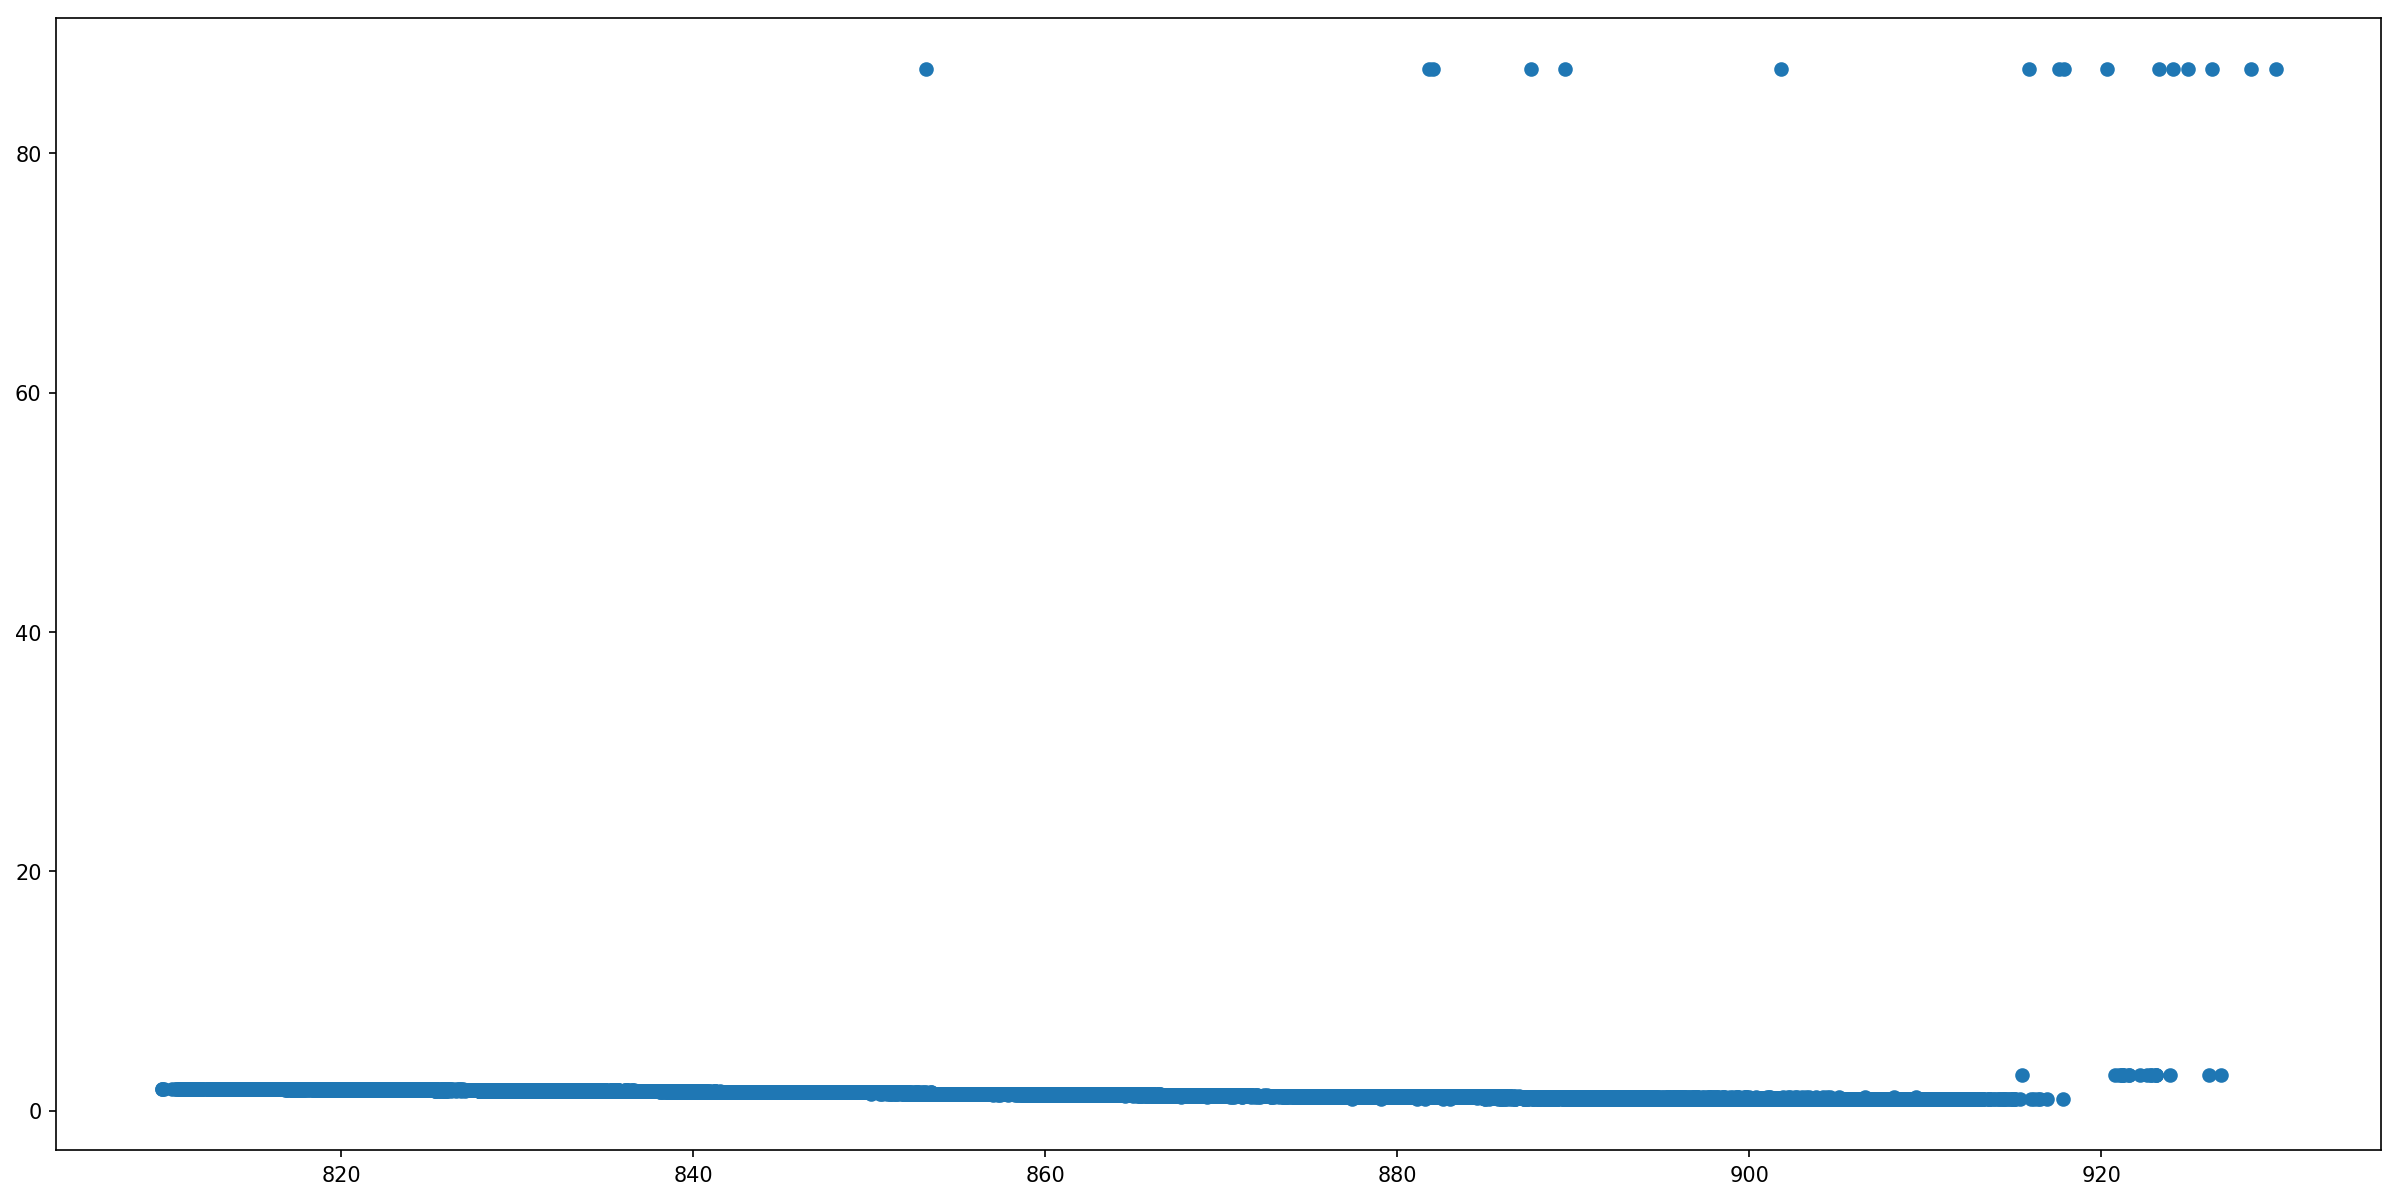

In [57]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:]['Altitude(metros)'])


In [58]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
309017              87.0     81932.0    2      17 -8.793662 -63.845931     12   
309018              87.0     81932.0    2      18 -8.793662 -63.845931     12   
309019              87.0     81932.0    2      19 -8.793662 -63.845931     12   
309038              87.0     81932.0    3      14 -8.793662 -63.845931     12   
309039              87.0     81932.0    3      15 -8.793662 -63.845931     12   
309040              87.0     81932.0    3      16 -8.793662 -63.845931     12   
309041              87.0     81932.0    3      17 -8.793662 -63.845931     12   
309042              87.0     81932.0    3      18 -8.793662 -63.845931     12   
309043              87.0     81932.0    3      19 -8.793662 -63.845931     12   
309044              87.0     81932.0    3      20 -8.793662 -63.845931     12   

                    Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
309017  Porto Velho-A925                0.0                      915.9   
309018  Porto Velho-A925                0.0                      924.9   
309019  Porto Velho-A925                0.0                      928.5   
309038  Porto Velho-A925                0.0                      853.2   
309039  Porto Velho-A925                0.0                      881.8   
309040  Porto Velho-A925                0.0                      887.6   
309041  Porto Velho-A925                0.0                      889.5   
309042  Porto Velho-A925                0.0                      920.3   
309043  Porto Velho-A925                0.0                      917.9   
309044  Porto Velho-A925                0.0                      924.1   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
309017                             941.3                             915.9   
309018                             925.0                             914.9   
309019                             928.5                             923.0   
309038                             853.3                               NaN   
309039                             881.8                             854.0   
309040                             889.4                             880.4   
309041                             889.5                             885.5   
309042                             920.3                             889.2   
309043                             921.2                             917.4   
309044                             925.5                             917.7   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
309017                 3465.380                   31.7   
309018                 2273.393                   32.2   
309019                 1647.929                   31.4   
309038                 1031.502                   25.2   
309039                 1205.584                   26.0   
309040                 1701.382                   27.3   
309041                 2527.694                   28.8   
309042                 1905.287                   29.8   
309043                 2066.471                   30.1   
309044                 1402.202                   30.4   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
309017                                 22.1                    32.8   
309018                                 22.0                    33.5   
309019                                 23.5                    32.8   
309038                                 21.8                    25.4   
309039                                 21.7                    26.2   
309040                                 21.9                    27.8   
309041                                 22.0                    29.0   
309042                                 21.9                    30.0   
309043                                 21.3                    30.7   
309044                                 21.8                    30.8   

        TEMPERATURA M

In [59]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 174094


In [60]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.023109
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                              9.424682
PRESSAO ATMOSFERICA (hPa)                     13.063658
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               7.682239
PRESSAO ATMOSFÉRICA MINIMA (hPa)               7.692365
RADIACAO GLOBAL (KJ/M2)                       49.147167
TEMPERATURA DO AR (C)                          7.150977
TEMPERATURA DO PONTO DE ORVALHO (C)            7.984118
TEMPERATURA MAXIMA (C)                         7.173093
TEMPERATURA MINIMA (C)                         7.172596
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     7

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [61]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     12   
1             185.0     81963.0    1       1 -9.358353 -69.926257     12   
2             185.0     81963.0    1       2 -9.358353 -69.926257     12   
3             185.0     81963.0    1       3 -9.358353 -69.926257     12   
4             185.0     81963.0    1       4 -9.358353 -69.926257     12   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      988.6                             988.6   
1                      989.4                             989.4   
2                      991.1                             991.1   
3                      991.5                             991.5   
4                      991.9                             992.1   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             988.0                      NaN   
1                             988.6                      NaN   
2                             989.5                      NaN   
3                             991.1                      NaN   
4                             991.5                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   23.1                                 22.1   
1                   22.7                                 21.8   
2                   23.2                                 22.3   
3                   23.2                                 22.2   
4                   23.1                                 22.0   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    24.6                    23.1   
1                    23.1                    22.7   
2                    23.2                    22.7   
3                    23.2                    23.0   
4                    23.2                    23.1   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.3   
1                                        22.0   
2                                        22.3   
3                                        22.3   
4                                        22.2   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.9                        94.0   
1                                        21.8                        95.0   
2                                        21.8                         NaN   
3                                        22.1                        94.0   
4                                        22.0                         NaN   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               94.0                               87.0   
1                               95.0                               94.0   
2                                NaN                                NaN   
3                               95.0                               94.0   
4                                NaN                                NaN   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.1                   354.0                         2.7   
1                0.0                   295.0                         0.7   
2                0.4                   239.0                         1.0   
3                0.5                    49.0                         1.4   
4                0.7                    27.0                         1.9   

   Year                     Cidade Estado Regiao  


In [62]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [63]:
data.dropna(inplace=True)

In [64]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')

In [65]:
data.describe().T

count          mean  \
Altitude(metros)                            2694807.0    373.309781   
Codigo OMM                                  2694807.0  85328.891656   
Day                                         2694807.0     15.977211   
H(UTC)                                      2694807.0     11.572633   
Latitude                                    2694807.0    -15.791718   
Longitude                                   2694807.0    -47.643188   
Month                                       2694807.0     12.000000   
PRECIPITACAO (mm)                           2694807.0      0.215474   
PRESSAO ATMOSFERICA (hPa)                   2694807.0    968.887623   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2694807.0    969.179866   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2694807.0    968.600268   
TEMPERATURA DO AR (C)                       2694807.0     25.187423   
TEMPERATURA DO PONTO DE ORVALHO (C)         2694807.0     19.498711   
TEMPERATURA MAXIMA (C)                      2694807.0     25.820474   
TEMPERATURA MINIMA (C)                      2694807.0     24.594529   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2694807.0     20.046725   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2694807.0     18.976731   
UMIDADE RELATIVA DO AR (%)                  2694807.0     73.704385   
UMIDADE RELATIVA DO MAXIMA AR (%)           2694807.0     76.558816   
UMIDADE RELATIVA DO MINIMA AR (%)           2694807.0     70.743546   
Year                                        2694807.0   2010.790607   

                                                    std           min  \
Altitude(metros)                             285.592257      1.161000   
Codigo OMM                                  2271.358309  81609.000000   
Day                                            8.937588      1.000000   
H(UTC)                                         6.926430      0.000000   
Latitude                                       8.211746    -33.742297   
Longitude                                      6.941536    -72.786778   
Month                                          0.000000     12.000000   
PRECIPITACAO (mm)                              1.583110      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.562644    891.800000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.568296    885.800000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.557451    885.200000   
TEMPERATURA DO AR (C)                          4.186862      4.100000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.090095     -9.400000   
TEMPERATURA MAXIMA (C)                         4.371713      4.600000   
TEMPERATURA MINIMA (C)                         3.996953      3.800000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     2.996147     -8.400000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.206996     -9.900000   
UMIDADE RELATIVA DO AR (%)                    18.251884     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             17.234412     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             19.055080     10.000000   
Year                                           2.962500   2000.000000   

                                                     25%           50%  \
Altitude(metros)                              104.000000    338.000000   
Codigo OMM                                  81970.000000  86728.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.358052    -16.088049   
Longitude                                     -52.403582    -48.164817   
Month                                          12.000000     12.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     945.900000    972.000000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              946.200000    972.300000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              945.700000    971.

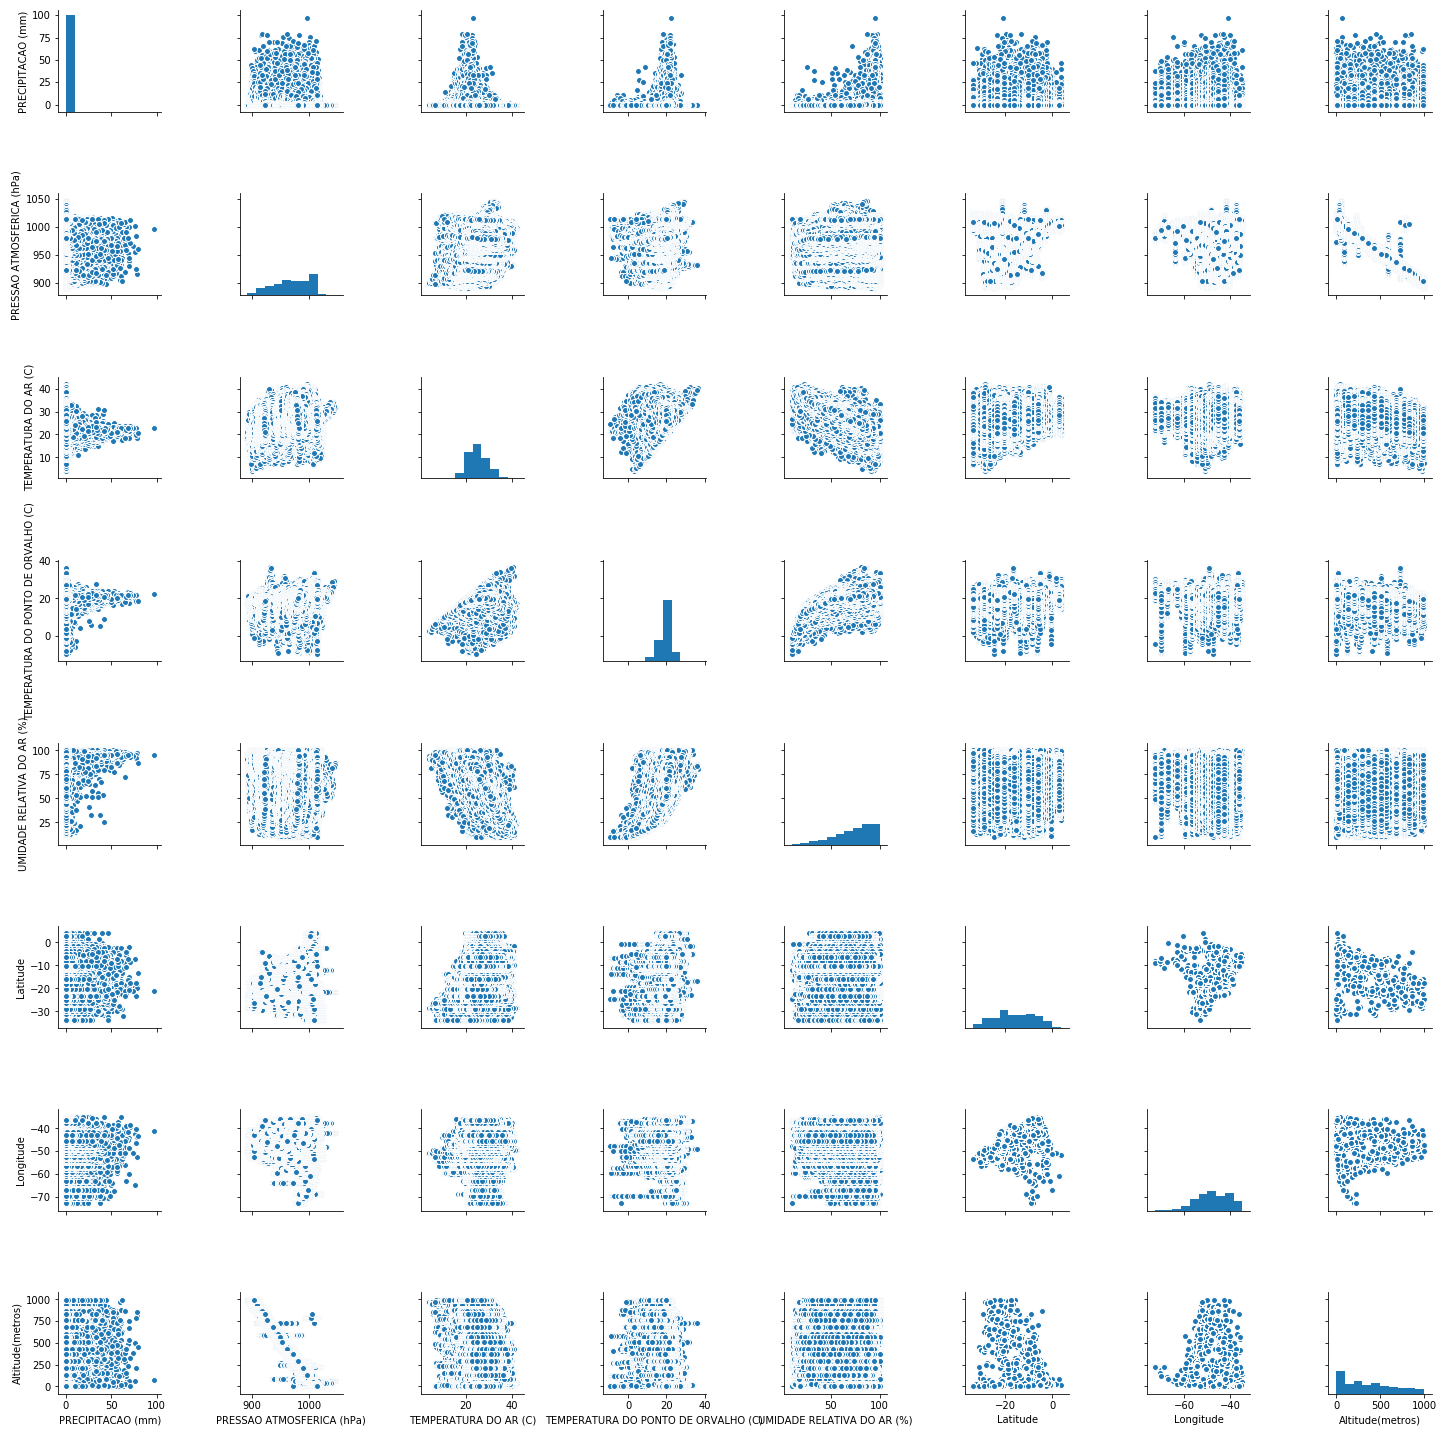

In [66]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_12_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     12   
1             185.0     81963.0    1       1 -9.358353 -69.926257     12   
2             185.0     81963.0    1       3 -9.358353 -69.926257     12   
3             185.0     81963.0    1       5 -9.358353 -69.926257     12   
4             185.0     81963.0    1       6 -9.358353 -69.926257     12   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      988.6   ...                      23.1   
1                      989.4   ...                      22.7   
2                      991.5   ...                      23.0   
3                      991.0   ...                      22.9   
4                      990.8   ...                      22.7   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.3   
1                                        22.0   
2                                        22.3   
3                                        22.0   
4                                        21.7   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.9                        94.0   
1                                        21.8                        95.0   
2                                        22.1                        94.0   
3                                        21.7                        93.0   
4                                        21.6                        94.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               94.0                               87.0  2008   
1                               95.0                               94.0  2008   
2                               95.0                               94.0  2008   
3                               94.0                               93.0  2008   
4                               94.0                               93.0  2008   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  

[5 rows x 25 columns]

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+str(12)+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  16.252055  11.510959   
Acaraú-A360                      67.0     81755.0  16.000000  11.500000   
Afonso Cláudio-A657             507.0     86827.0  15.996638  11.500672   
Aimorés-A534                    288.0     86803.0  16.005269  11.520777   
Alegre-A617                     129.0     86828.0  16.185435  11.511702   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288   12.0           0.079486   
Acaraú-A360          -3.121067 -40.087288   12.0           0.010215   
Afonso Cláudio-A657 -20.104194 -41.106861   12.0           0.298722   
Aimorés-A534        -19.532768 -41.090801   12.0           0.301415   
Alegre-A617         -20.750412 -41.488852   12.0           0.379157   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1010.402894   
Acaraú-A360                        1003.083545   
Afonso Cláudio-A657                 954.876799   
Aimorés-A534                        984.404803   
Alegre-A617                         996.385834   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1010.654880     ...        
Acaraú-A360                               1003.343395     ...        
Afonso Cláudio-A657                        955.129388     ...        
Aimorés-A534                               984.676347     ...        
Alegre-A617                                996.652657     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    25.804127   
Acaraú-A360                      27.411540   
Afonso Cláudio-A657              24.469132   
Aimorés-A534                     25.722117   
Alegre-A617                      26.005094   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  22.544041   
Acaraú-A360                                    21.173733   
Afonso Cláudio-A657                            19.138030   
Aimorés-A534                                   19.979012   
Alegre-A617                                    20.480548   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     26.067825               25.554469   
Acaraú-A360                       28.062711               26.830108   
Afonso Cláudio-A657               25.185104               23.797041   
Aimorés-A534                      26.336766               25.161442   
Alegre-A617                       26.650234               25.403662   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.850753   
Acaraú-A360                                           21.593126   
Afonso Cláudio-A657                                   19.767787   
Aimorés-A534                                          20.547802   
Alegre-A617                                           21.094645   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.244606   
Acaraú-A360                                           20.752112   
Afonso Cláudio-A657                                   18.536348   
Aimorés-A534                                          19.459229   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_12_mean.csv')

In [4]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            459.0    364.728020   283.034068   
Codigo OMM                                  459.0  85204.355120  2323.906472   
Day                                         459.0     15.993210     0.439737   
H(UTC)                                      459.0     11.571570     0.179161   
Latitude                                    459.0    -15.372818     8.267324   
Longitude                                   459.0    -48.014903     7.255276   
Month                                       459.0     12.000000     0.000000   
PRECIPITACAO (mm)                           459.0      0.214803     0.117253   
PRESSAO ATMOSFERICA (hPa)                   459.0    969.699576    31.029332   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            459.0    969.805423    31.279263   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            459.0    969.224192    31.265980   
TEMPERATURA DO AR (C)                       459.0     25.282343     2.099620   
TEMPERATURA DO PONTO DE ORVALHO (C)         459.0     19.575694     2.101069   
TEMPERATURA MAXIMA (C)                      459.0     25.913796     2.102324   
TEMPERATURA MINIMA (C)                      459.0     24.687777     2.101326   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  459.0     20.126134     2.057025   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  459.0     19.052587     2.146858   
UMIDADE RELATIVA DO AR (%)                  459.0     73.737590     7.958306   
UMIDADE RELATIVA DO MAXIMA AR (%)           459.0     76.544210     7.930446   
UMIDADE RELATIVA DO MINIMA AR (%)           459.0     70.714894     8.081012   
Year                                        459.0   2011.085482     1.226938   
Precipitação Acum.(mm)                      459.0    151.556274    84.525754   

                                                     min           25%  \
Altitude(metros)                                1.161000    105.500000   
Codigo OMM                                  81609.000000  81950.500000   
Day                                            14.483051     15.904517   
H(UTC)                                         10.000000     11.500000   
Latitude                                      -33.742297    -21.917960   
Longitude                                     -72.786778    -52.947681   
Month                                          12.000000     12.000000   
PRECIPITACAO (mm)                               0.004032      0.129100   
PRESSAO ATMOSFERICA (hPa)                     901.765483    948.476784   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              886.666667    948.414544   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              886.100000    947.888734   
TEMPERATURA DO AR (C)                          19.113212     24.007262   
TEMPERATURA DO PONTO DE ORVALHO (C)            13.033333     17.915857   
TEMPERATURA MAXIMA (C)                         19.718911     24.622935   
TEMPERATURA MINIMA (C)                         18.552799     23.369962   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     14.266667     18.485166   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     12.333333     17.371964   
UMIDADE RELATIVA DO AR (%)                     42.751344     70.698634   
UMIDADE RELATIVA DO MAXIMA AR (%)              45.165323     73.619529   
UMIDADE RELATIVA DO MINIMA AR (%)              40.321237     67.263769   
Year                                         2005.000000   2010.527942   
Precipitação Acum.(mm)                          2.000000     90.175000   

                                                     50%           75%  \
Altitude(metros)                              313.000000    555.500000   
Codigo OMM                                  86711.000000  86854.500000   
Day                                            16.000000     16.041821   
H(UTC)                                         11.511226     11.587442   
Latitude                                      -15.300159     -8.506776   
Longitude                                     -48.201231

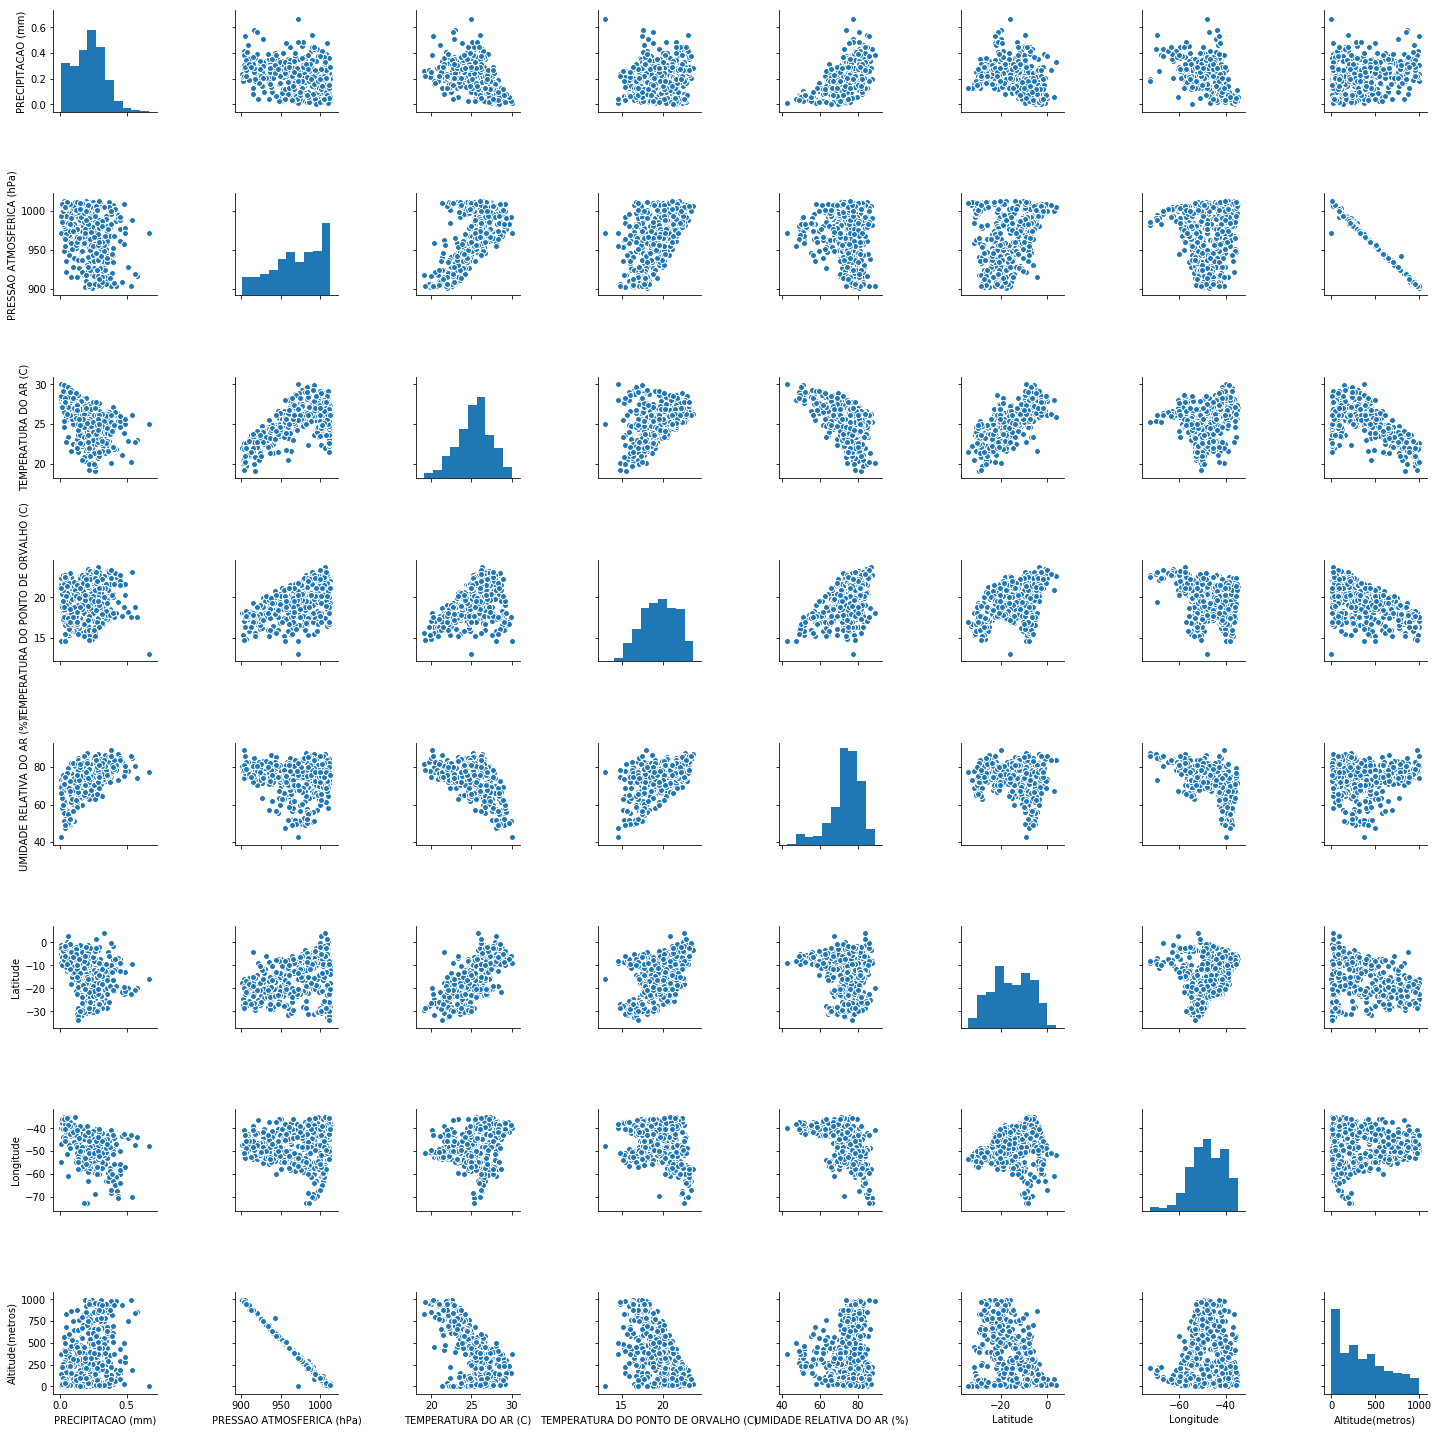

In [69]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [70]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [71]:
from sklearn.model_selection import train_test_split

X_ur_train, X_ur_test, y_ur_train, y_ur_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_ur_train)
X_ur_train = scaler_x.transform(X_ur_train)
X_ur_test  = scaler_x.transform(X_ur_test)

scaler_y.fit(y_ur_train)
y_ur_train = scaler_y.transform(y_ur_train)
y_ur_test  = scaler_y.transform(y_ur_test)

In [83]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_ur_train,y_ur_train.ravel())
y_ur_pred = mlp.predict(X_ur_test)


In [84]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))

Variance: 0.846209252095205
Erro absoluto medio: 2.0632496585582545
Erro quadrado medio: 6.71081249332913
Erro absoluto mediano: 1.7027647943181847
R2 Score: 0.8394513275644441


In [85]:
errors=abs(scaler_y.inverse_transform(y_ur_test).ravel()-scaler_y.inverse_transform([y_ur_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.005901355683803899 	MAX: 8.275641488889711 	MEAN: 2.0632496585582545	Std: 1.5664652373379937


In [86]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_ur_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_ur_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
24  47.618607  52.069140
72  54.492788  55.249153
70  55.641340  58.700257
96  61.280560  59.365458
32  62.707707  60.683743

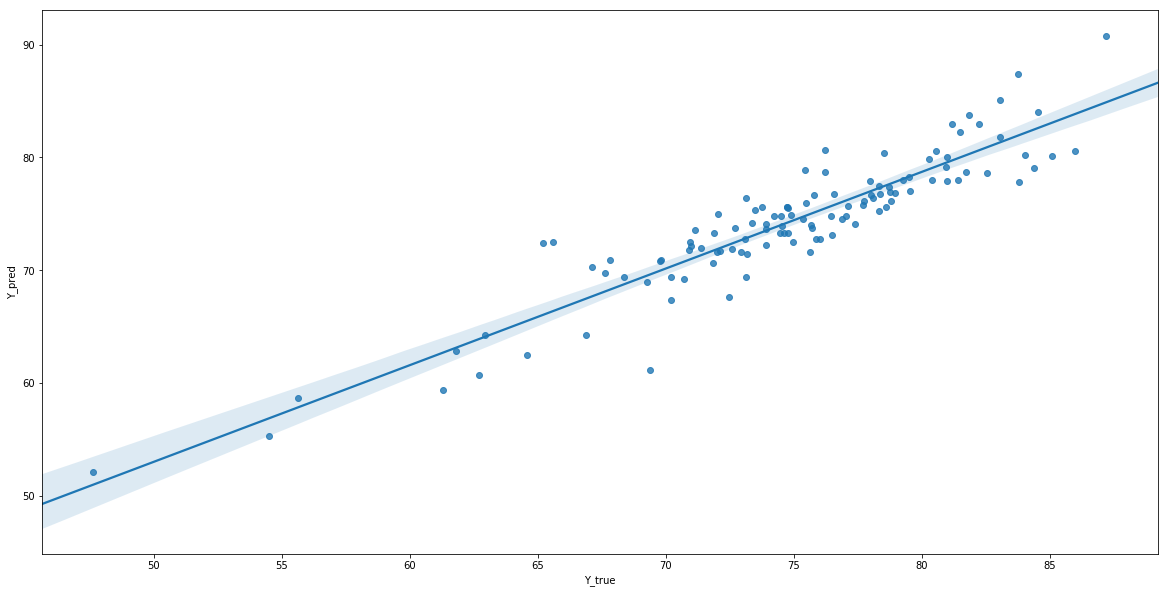

In [87]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

In [88]:
target_tmin = ['TEMPERATURA MINIMA (C)']
features_tmin = data_mean.columns.tolist()
features_tmin.remove('Day')
features_tmin.remove('Month')
features_tmin.remove('Codigo OMM')
features_tmin.remove('Year')
features_tmin.remove('H(UTC)')
features_tmin.remove('UMIDADE RELATIVA DO AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_tmin.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO AR (C)')
features_tmin.remove('TEMPERATURA MAXIMA (C)')
features_tmin.remove('TEMPERATURA MINIMA (C)')
features_tmin.remove('PRECIPITACAO (mm)')
features_tmin.remove('PRESSAO ATMOSFERICA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')
features_tmin

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)']

In [89]:
from sklearn.model_selection import train_test_split

X_tmin_train, X_tmin_test, y_tmin_train, y_tmin_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_tmin_train)
X_tmin_train = scaler_x.transform(X_tmin_train)
X_tmin_test  = scaler_x.transform(X_tmin_test)

scaler_y.fit(y_tmin_train)
y_tmin_train = scaler_y.transform(y_tmin_train)
y_tmin_test  = scaler_y.transform(y_tmin_test)

In [95]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_tmin_train,y_tmin_train.ravel())
y_tmin_pred = mlp.predict(X_tmin_test)


In [96]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))

Variance: 0.8575231951612986
Erro absoluto medio: 2.2027855589017573
Erro quadrado medio: 8.202338434685194
Erro absoluto mediano: 1.6613947683337784
R2 Score: 0.85407834077493


In [97]:
errors=abs(scaler_y.inverse_transform(y_tmin_test).ravel()-scaler_y.inverse_transform([y_tmin_pred,]))
print('Error(tmin_true - tmin_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(tmin_true - tmin_pred)
MIN: 0.01815638213165016 	MAX: 7.944703521457043 	MEAN: 2.2027855589017573	Std: 1.8303207959751393


In [98]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_tmin_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_tmin_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
100  49.752304  53.803036
52   51.692610  53.858717
16   49.518885  54.753451
76   54.492788  56.568911
99   62.864508  59.539190

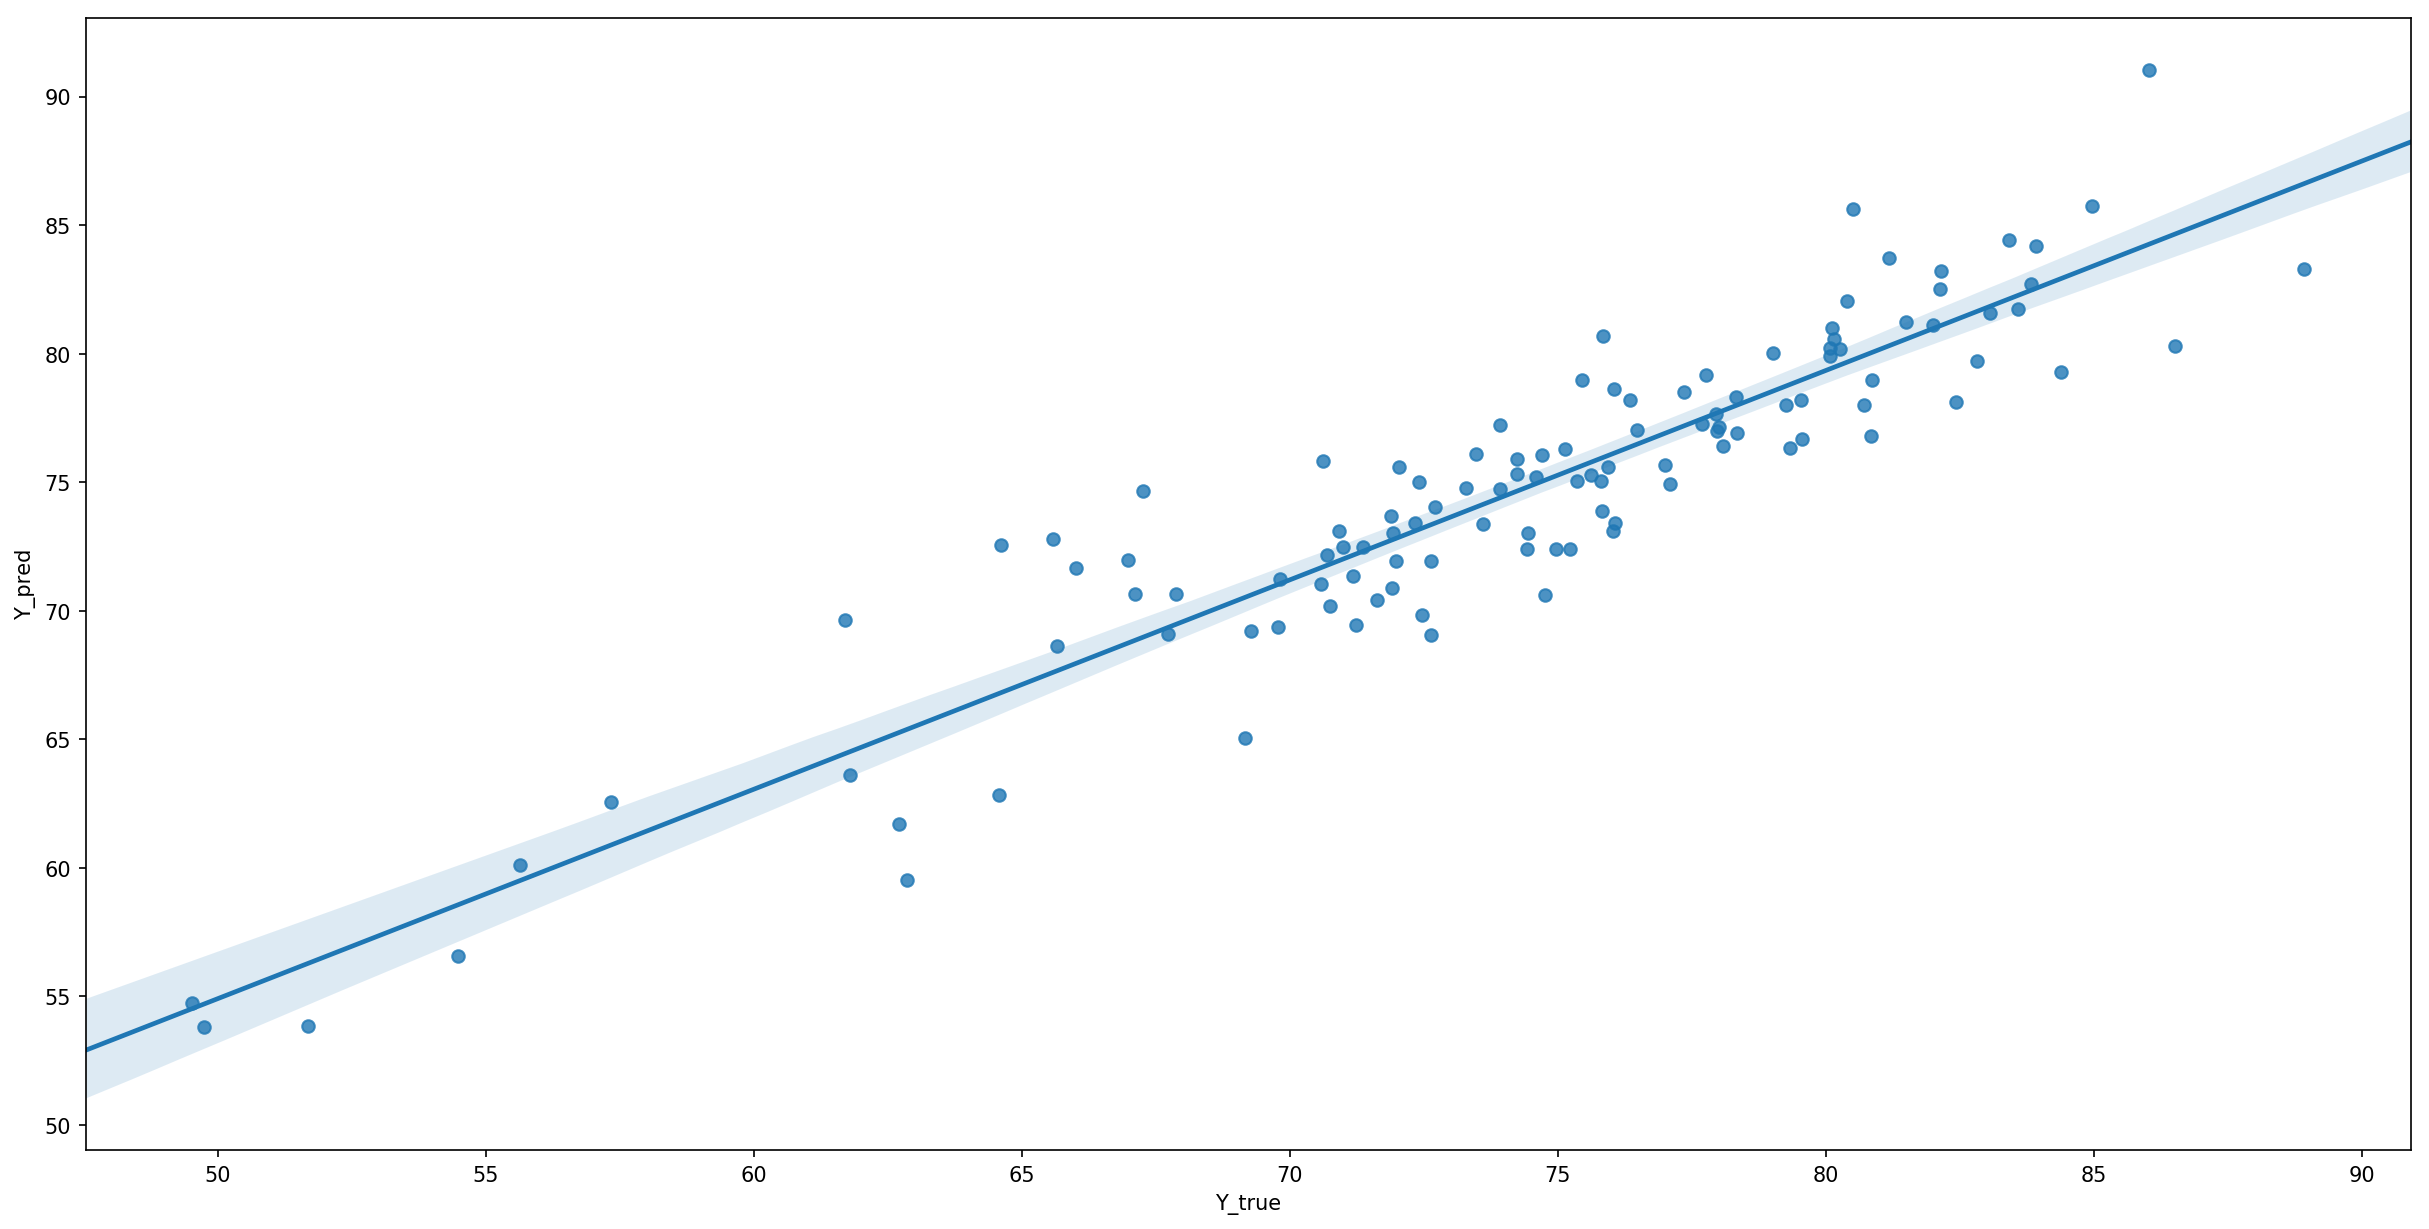

In [99]:
fig,ax = plt.subplots(figsize=(20,10),dpi=150)
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)